In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
sns.set_style("ticks")


In [2]:
params = {'axes.labelsize': 'large',
          'axes.titlesize':'large'}       ###'axes.titlesize':'xx-large'
pylab.rcParams.update(params)

In [3]:
df = pd.read_csv('/Users/zihaoxu/R_repos/BLB-RF-Sim/CSV/Clustered_n_s_pct_MSE_5000.csv')

In [32]:
#df.loc[78,'time'] = df.loc[78,'time'] * 60
#df.loc[77,'time'] = 52.064077*2-43.829549

In [79]:
df.loc[78,['ntree', 'time','MSE']] = [500, 9.88877215385437, 2.6285250765183]

In [80]:
df[df.gamma==1]

,Unnamed: 0,n,gamma,s,ntree,time,MSE
78,79,5000,1.0,1,500,9.888772,2.628525


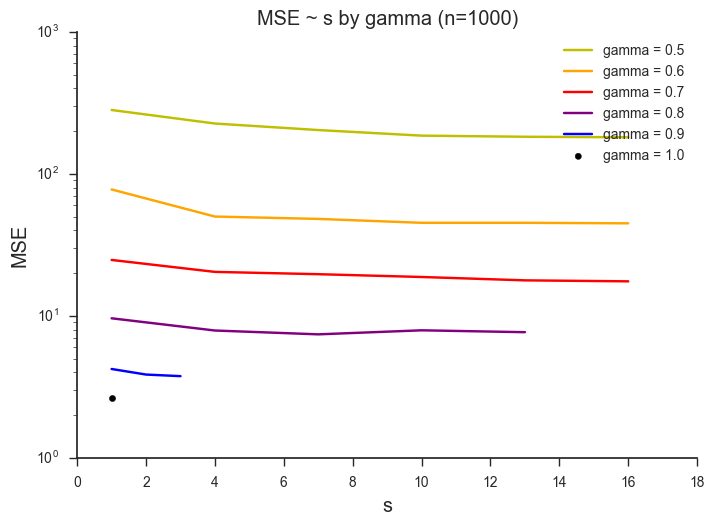

In [82]:
plt.figure()
color_dict = {.5:'y', .6:'orange', .7:'r', .8:'purple', .9:'b',1:'k'}
for ga in df['gamma'].unique():
    temp = df[(df['gamma']==ga) & (df.ntree==500)]
    if(ga==1.):
        plt.scatter(temp['s'], temp['MSE'], s = 20, c = color_dict[ga], label = "gamma = " + str(ga))
    else:
        plt.semilogy(temp['s'], temp['MSE'], c = color_dict[ga], label = "gamma = " + str(ga))
plt.legend(loc = 1)
plt.xlabel('s')
plt.ylabel('MSE')
plt.title('MSE ~ s by gamma (n=1000)')
sns.despine()
plt.show()

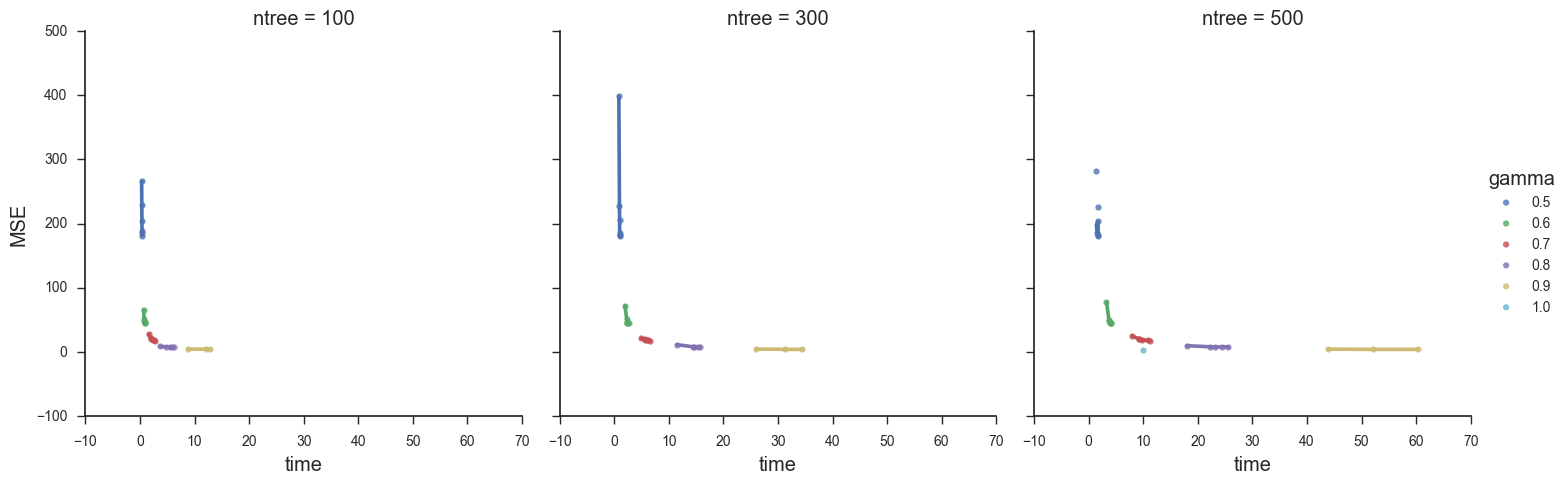

In [83]:
sns.lmplot(x = 'time', y = 'MSE', hue = 'gamma', data = df, col = 'ntree',lowess=True)
plt.show()

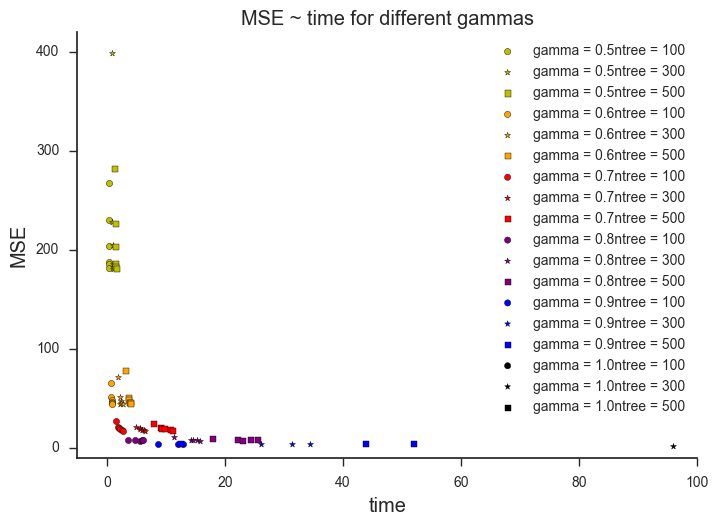

In [47]:
plt.figure()
symbol_list = ['o', 'v', ]
color_dict = {.5:'y', .6:'orange', .7:'r', .8:'purple', .9:'b',1:'k'}
marker_dict = {100:'o', 300: '*', 500:'s'}
for ga in df['gamma'].unique():
    for ntree in df['ntree'].unique():
        temp = df[(df['gamma']==ga) & (df['ntree']==ntree)]
        plt.scatter(temp['time'], temp['MSE'], c = color_dict[ga], marker = marker_dict[ntree], label = "gamma = " + str(ga) + 'ntree = ' + str(ntree))
plt.legend(loc = 1)
plt.xlabel('time')
plt.ylabel('MSE')
plt.xlim(-5,100)
plt.ylim(-10,420)
plt.title('MSE ~ time for different gammas')
sns.despine()
plt.show()

In [12]:
plt.figure()
color_dict = {25:'y', 50:'orange', 100:'r', 200:'purple', 400:'b'}
for n in df['n'].unique():
    temp = df[df['n']==n]
    grouped = temp.groupby('s').mean()
    plt.plot(grouped.index, grouped['MSE'], c = color_dict[n], label = "n = " + str(n))
plt.legend(loc = 4)
plt.xlabel('s')
plt.ylabel('MSE')
plt.title('MSE ~ s for different ns')
plt.show()

KeyError: 1000

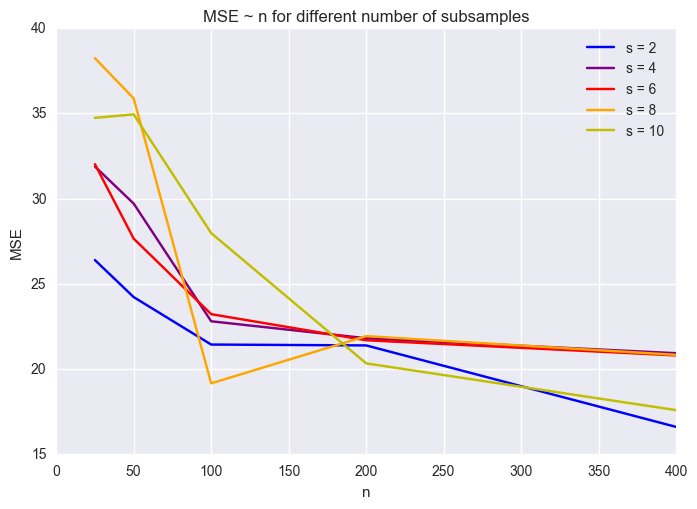

In [57]:
plt.figure()
color_dict = {2:'b', 4:'purple', 6:'r', 8:'orange', 10:'y'}
for s in df['s'].unique():
    temp = df[df['s']==s]
    grouped = temp.groupby('n').mean()
    plt.plot(grouped.index, grouped['MSE'], c = color_dict[s], label = "s = " + str(s))
plt.legend()
plt.xlabel('n')
plt.ylabel('MSE')
plt.title('MSE ~ n for different number of subsamples')
plt.show()

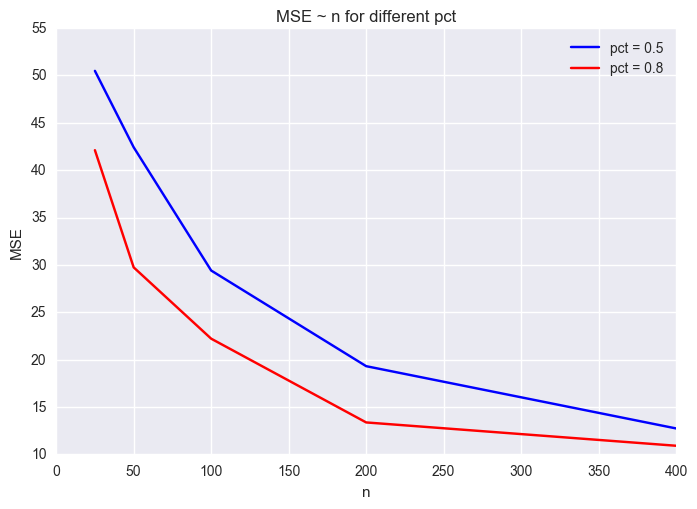

In [60]:
plt.figure()
color_dict = {0.5:'b',0.8:'r'}
for pct in df['pct'].unique():
    temp = df[df['pct']==pct]
    grouped = temp.groupby('n').mean()
    plt.plot(grouped.index, grouped['MSE'], c = color_dict[pct], label = "pct = " + str(pct))
plt.xlabel('n')
plt.ylabel('MSE')
plt.title('MSE ~ n for different pct')
plt.legend()
plt.show()

In [96]:
temp = df[df['pct']==.5]
temp.groupby('n').mean().MSE